## Import libraries and load data

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("prepped_churn_data.csv")
df.head(5)

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,0,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
2,2,1,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
3,45,0,42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
4,2,1,70.70,151.65,1,0.466205,0,0,0,0,0,0,0


## Create features and targets

In [3]:

features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify = targets, random_state=42)

## Decision Trees

In [4]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9945013272658324
0.7189988623435722


This output represents the accuracy scores of the Decision Tree classifier on the training and testing sets, respectively.

The first value, 0.9945, indicates that the model achieved an accuracy of approximately 99.45% on the training set meaning that 99.45% of the training instances were correctly classified by the model.

The second value, 0.719, represents the accuracy of the model on the testing set, which is approximately 71.9%. This indicates that 71.9% of the testing instances were correctly classified by the model.

Comparing these two scores, we observe a large discrepancy between the accuracy on the training set and the testing set. This suggests that the model may be overfitting the training data, as it performs significantly better on the data it was trained on compared to unseen data.

In [6]:
dt.get_depth()

30

A depth of 30 suggests that the Decision Tree has a complex structure with many levels of decision nodes. This could imply that the tree has learned intricate patterns in the training data, potentially leading to overfitting. Overfitting occurs when a model learns to capture noise in the training data rather than the underlying patterns, resulting in poor generalization to unseen data.

## Exploring with a viable max_depth

In [8]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))


0.7533181645809632
0.742320819112628


The first value indicates that approximately 75.33% of the instances in the training set were correctly classified by the model.

The second value indicates that approximately 74.23% of the instances in the testing set were correctly classified by the model.

Comparing these two scores, they are relatively close, suggesting that the model is not suffering from significant overfitting.

Since the accuracies on both sets are comparable, it suggests that the model is performing consistently well on both the training and testing data, indicating a good balance between capturing the underlying patterns in the data and avoiding overfitting.

In [9]:
dt.get_depth()

2

The Decision Tree model has a depth of 2. A depth of 2 indicates that the Decision Tree has two levels of decision nodes, including the root node and one level of splits.

A depth of 2 suggests that the Decision Tree model is relatively simple, with only a limited number of decision rules. Such a shallow tree is less likely to overfit the training data compared to deeper trees, as it captures less complex patterns.

## Plotting the tree

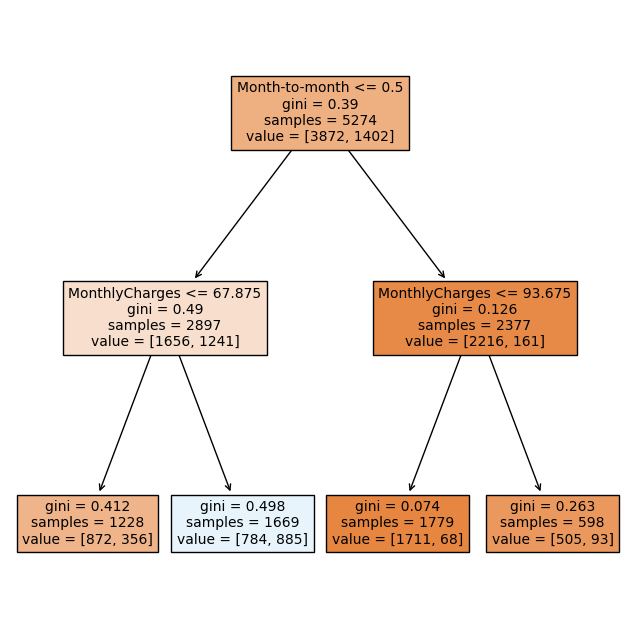

In [10]:
f = plt.figure(figsize=(8,8))
_ = plot_tree(dt,fontsize=10,feature_names=features.columns,filled=True)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [13]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.804133485020857
0.7889647326507395


The training score is higher (0.8041) than the testing score (0.7890), but the difference is not excessively large.

## Tune the max_features

In [14]:
import math
math.sqrt(x_train.shape[1])

3.4641016151377544

In [15]:
rfc = RandomForestClassifier(max_depth=2, max_features=7, random_state=42)
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.7847933257489571
0.7753128555176336


Here, we are tuning the max_features hyperparameter for the RandomForestClassifier. The max_features parameter determines the maximum number of features each decision tree in the forest is allowed to use when splitting a node. It was set to the square root of the number of features in the dataset using math.sqrt(x_train.shape[1]), which is approximately 3.46.

Then, we create a RandomForestClassifier (rfc) with a specified max_depth of 2, max_features of 7, and a fixed random state for reproducibility.This model is fit on the training data (x_train and y_train) and the accuracy scores on both the training and testing datasets displayed


**Setting max_features** 

By setting max_features to the square root of the number of features, we are limiting each decision tree to consider a subset of features when making a split. This helps in reducing overfitting and improving the generalization of the model.


**Results**

    Training Accuracy: 0.7848
    Testing Accuracy: 0.7753

**Interpretation**

The training accuracy is slightly higher than the testing accuracy, which is expected, as the model has seen the training data.
The model's performance is not significantly affected by tuning max_features, as the scores are quite close.

## Feature selection

In [16]:
import seaborn as sns

<AxesSubplot: >

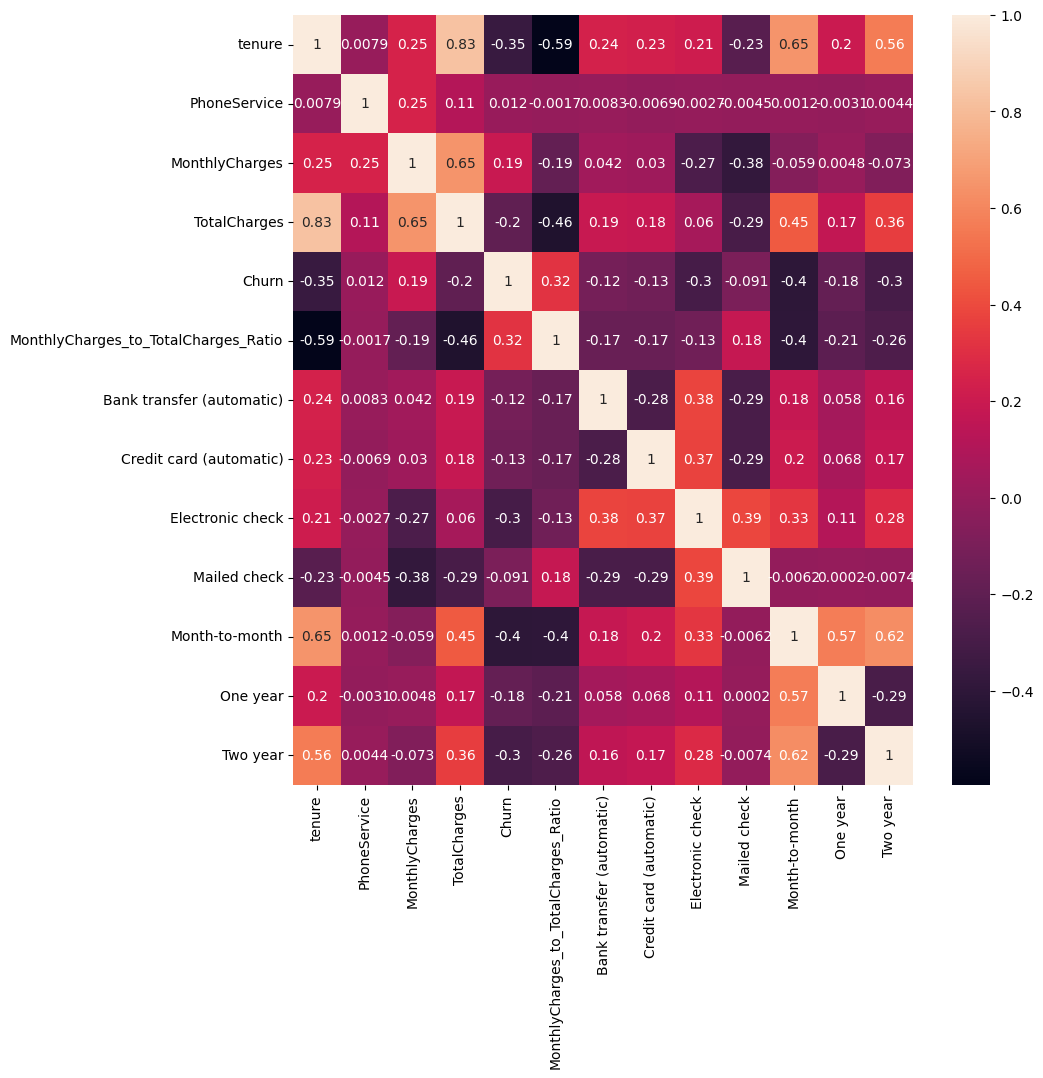

In [17]:
f = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Feature importances

<AxesSubplot: title={'center': 'Feature Importance'}>

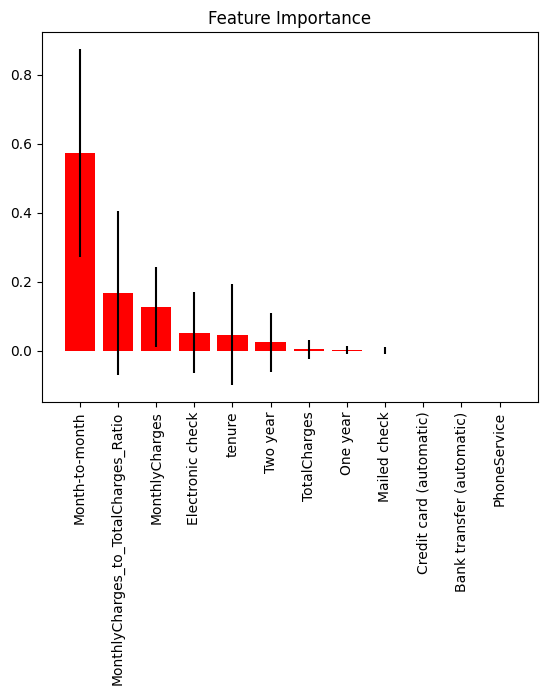

In [18]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc,feature_names = features.columns, x_tick_rotation=90)

It can be seen that features such as Two year, TotalCharges an others going left, are less important

## Dropping the less important features

In [19]:
new_features = features.drop(['Two year', 'TotalCharges', 'One year', 'Mailed check', 'Credit card (automatic)', 'Bank transfer (automatic)', 'PhoneService'], axis =1) 


In [21]:
new_features.sample()

,tenure,MonthlyCharges,MonthlyCharges_to_TotalCharges_Ratio,Electronic check,Month-to-month
3735,72,104.9,0.013566,1,1


In [22]:
x_train,x_test,y_train,y_test=train_test_split(new_features, targets, stratify=targets, random_state=42)

In [24]:
rfc = RandomForestClassifier(max_depth=2, max_features=7, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.7800530906332954
0.7764505119453925


There's no significant change from tthe previous values before removing the less important features

<AxesSubplot: title={'center': 'Feature Importance'}>

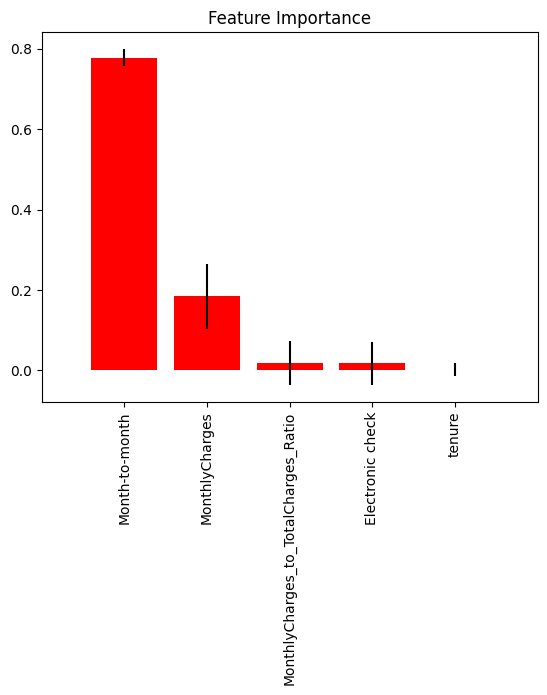

In [26]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

## Summary

We execute both Decision Tree and Random Forest classification tasks on churn data. Beginning with Decision Trees, the churn data is first loaded from a CSV file and divided into features and target variables. Subsequently, the data is split into training and testing sets, after which a Decision Tree classifier is constructed and evaluated on both sets. We also include visualization of the Decision Tree for insights into its structure. To mitigate overfitting, the tree is pruned by limiting its depth to 2 and the model's performance is assessed with this modification.

Moving to Random Forest, we construct a Random Forest classifier with a specified maximum depth of 5 and its performance evaluated. We use the square root of the number of features for max_features to avoid overfitting. Additionally, we showcase feature selection techniques by generating a heatmap of feature correlations and display feature importances using the Random Forest classifier. Finally, less important features are dropped, and the Random Forest classifier's performance is re-evaluated.
